## Libraries

In [ ]:
import unittest
from preprocessing import get_complete_flights
import traffic
from traffic.core import Traffic
from rich.pretty import pprint
import pandas as pd
import numpy as np
from datetime import datetime
import srtm
import folium
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## Importing a month's data ( May 2022 ) and extracting 3 days

In [2]:
file = "Frankfurt_LH_2205.h5"

t_09 = Traffic.from_file(file, key="LH_220509", parse_dates=["day", "firstseen", "hour", "last_position", "lastseen", "timestamp"])
t_10 = Traffic.from_file(file, key="LH_220510", parse_dates=["day", "firstseen", "hour", "last_position", "lastseen", "timestamp"])
t_11 = Traffic.from_file(file, key="LH_220511", parse_dates=["day", "firstseen", "hour", "last_position", "lastseen", "timestamp"])

In [3]:
three_days_data = pd.concat([t_09.data, t_10.data,t_11.data ], axis=0)

## Choosing only flights of 9th May 2022

In [4]:
dft09 = pd.concat([t_09.data])

## Ordering columns in a specific order

In [5]:
dft09 = dft09.reindex(columns= ['timestamp', 'onground', 'callsign', 'altitude', 'geoaltitude', 'latitude', 'longitude', 'groundspeed', 'vertical_rate', 'hour', 'icao24', 'last_position', 'lastseen', 'origin', 'spi', 'squawk', 'track', 'flight_id', 'alert', 'day', 'firstseen', 'destination'])

In [7]:
dft09

,timestamp,onground,callsign,altitude,geoaltitude,latitude,longitude,groundspeed,vertical_rate,hour,...,lastseen,origin,spi,squawk,track,flight_id,alert,day,firstseen,destination
42158,2022-05-09 00:47:48+00:00,False,DLH465,1550.0,1300.0,28.463947,-81.298343,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42159,2022-05-09 00:47:49+00:00,False,DLH465,1600.0,1300.0,28.465669,-81.298397,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42160,2022-05-09 00:47:50+00:00,False,DLH465,1600.0,1300.0,28.465669,-81.298397,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42161,2022-05-09 00:47:51+00:00,False,DLH465,1600.0,1475.0,28.465669,-81.298397,177.0,1728.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,3.556181,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42162,2022-05-09 00:47:52+00:00,False,DLH465,1600.0,1500.0,28.465669,-81.298397,177.0,1664.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,5.517136,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71660,2022-05-09 18:43:54+00:00,False,DLH8PN,325.0,775.0,50.023545,8.517448,146.0,-704.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71661,2022-05-09 18:43:55+00:00,False,DLH8PN,325.0,775.0,50.023545,8.517448,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71662,2022-05-09 18:43:56+00:00,False,DLH8PN,325.0,775.0,50.023871,8.518784,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71663,2022-05-09 18:43:57+00:00,False,DLH8PN,300.0,750.0,50.023871,8.518784,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF


In [71]:
dft09.sort_values(by=['callsign','timestamp'], inplace = True)

In [8]:
dft09

,timestamp,onground,callsign,altitude,geoaltitude,latitude,longitude,groundspeed,vertical_rate,hour,...,lastseen,origin,spi,squawk,track,flight_id,alert,day,firstseen,destination
42158,2022-05-09 00:47:48+00:00,False,DLH465,1550.0,1300.0,28.463947,-81.298343,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42159,2022-05-09 00:47:49+00:00,False,DLH465,1600.0,1300.0,28.465669,-81.298397,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42160,2022-05-09 00:47:50+00:00,False,DLH465,1600.0,1300.0,28.465669,-81.298397,179.0,1856.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,355.183085,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42161,2022-05-09 00:47:51+00:00,False,DLH465,1600.0,1475.0,28.465669,-81.298397,177.0,1728.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,3.556181,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
42162,2022-05-09 00:47:52+00:00,False,DLH465,1600.0,1500.0,28.465669,-81.298397,177.0,1664.0,2022-05-09 00:00:00+00:00,...,2022-05-09 08:43:57+00:00,KMCO,False,NaN,5.517136,DLH465_000,False,2022-05-09 00:00:00+00:00,2022-05-09 00:47:48+00:00,EDDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71660,2022-05-09 18:43:54+00:00,False,DLH8PN,325.0,775.0,50.023545,8.517448,146.0,-704.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71661,2022-05-09 18:43:55+00:00,False,DLH8PN,325.0,775.0,50.023545,8.517448,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71662,2022-05-09 18:43:56+00:00,False,DLH8PN,325.0,775.0,50.023871,8.518784,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF
71663,2022-05-09 18:43:57+00:00,False,DLH8PN,300.0,750.0,50.023871,8.518784,146.0,-832.0,2022-05-09 18:00:00+00:00,...,2022-05-09 18:43:58+00:00,EKCH,False,5663,69.581574,DLH8PN_435,False,2022-05-09 00:00:00+00:00,2022-05-09 17:37:46+00:00,EDDF


## Some plot functions with Haversine distance function:
- Variable Distribution Plot
- Flight Path in 3D with geo-coordinates and altitude
- Flight Path on Globe

In [118]:
def plotdistrib(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

    #Latitude and Longtitude values around 50.03652, 8.56127 indicate that the aircraft is near EDDF airport
    sns.histplot(data=data, x='latitude', kde=True, ax=axes[0,0], color='darkcyan')
    axes[0,0].set_title('Latitude Distribution')

    sns.histplot(data=data, x='longitude', kde=True, ax=axes[0,1], color='darkcyan')
    axes[0,1].set_title('Longitude Distribution')

    sns.histplot(data=data, x='groundspeed', kde=True, ax=axes[1,0], color='darkcyan')
    axes[1,0].set_title('Groundspeed Distribution')

    sns.histplot(data=data, x='vertical_rate', kde=True, ax=axes[1,1], color='darkcyan')
    axes[1,1].set_title('Vertical Rate Distribution')

    sns.histplot(data=data, x='onground', kde=True, ax=axes[2,0], color='red')
    axes[2,0].set_title('Onground Distribution')

def plot3Daxis(flight):
    latitude = flight['latitude'].to_numpy()
    longitude = flight['longitude'].to_numpy()
    altitude = flight['geoaltitude'].to_numpy()

    # create a 3D scatter plot of the flight path on a globe
    fig = go.Figure(data=go.Scatter3d(x=longitude, y=latitude, z=altitude, mode='markers'))
    fig.update_layout(scene=dict(
                        xaxis_title='Longitude',
                        yaxis_title='Latitude',
                        zaxis_title='Altitude'),
                        title=f'Flight path on 3D Axes')
    fig.show()

def plotonmap(flight):

    average_lat = flight['latitude'].mean()
    average_lon = flight['longitude'].mean()
    flight_map = folium.Map(location=[average_lat, average_lon], zoom_start=7)

    folium.PolyLine(locations=flight[['latitude', 'longitude']].values, color='red', weight=2.5).add_to(flight_map)

    return(flight_map)

def haversine(lat1, lon1,  lat2, lon2):
    """
    vectorized haversine distance. Can take in pandas series, np arrays or individual values
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [74]:
dft09[dft09.onground == True].groundspeed.describe()

count    20671.000000
mean       117.189589
std         53.553824
min         49.000000
25%        103.000000
50%        106.000000
75%        115.000000
max        560.000000
Name: groundspeed, dtype: float64

In [108]:
dft09["distance"] = haversine(dft09["latitude"], dft09["longitude"], 50.0271, 8.53356)

In [109]:
dft09

,timestamp,onground,callsign,altitude,geoaltitude,latitude,longitude,groundspeed,vertical_rate,hour,...,origin,spi,squawk,track,flight_id,alert,day,firstseen,destination,distance
228881,2022-05-09 04:06:29+00:00,False,DLH001,-350.0,200.0,53.636092,9.991096,123.0,64.0,2022-05-09 04:00:00+00:00,...,EDDH,False,NaN,332.807648,DLH001_332,False,2022-05-09 00:00:00+00:00,2022-05-09 04:06:29+00:00,EDDF,413.327493
228882,2022-05-09 04:06:30+00:00,False,DLH001,-350.0,200.0,53.637222,9.990104,126.0,64.0,2022-05-09 04:00:00+00:00,...,EDDH,False,NaN,333.027157,DLH001_332,False,2022-05-09 00:00:00+00:00,2022-05-09 04:06:29+00:00,EDDF,413.432603
228883,2022-05-09 04:06:31+00:00,False,DLH001,-350.0,200.0,53.637768,9.989642,126.0,64.0,2022-05-09 04:00:00+00:00,...,EDDH,False,NaN,333.027157,DLH001_332,False,2022-05-09 00:00:00+00:00,2022-05-09 04:06:29+00:00,EDDF,413.483613
228884,2022-05-09 04:06:32+00:00,False,DLH001,-350.0,200.0,53.638367,9.989083,126.0,64.0,2022-05-09 04:00:00+00:00,...,EDDH,False,NaN,333.027157,DLH001_332,False,2022-05-09 00:00:00+00:00,2022-05-09 04:06:29+00:00,EDDF,413.538780
228885,2022-05-09 04:06:33+00:00,False,DLH001,-350.0,200.0,53.638367,9.989083,126.0,64.0,2022-05-09 04:00:00+00:00,...,EDDH,False,NaN,333.027157,DLH001_332,False,2022-05-09 00:00:00+00:00,2022-05-09 04:06:29+00:00,EDDF,413.538780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70217,2022-05-09 14:10:45+00:00,False,DLH9YX,250.0,675.0,50.024551,8.521777,143.0,-704.0,2022-05-09 14:00:00+00:00,...,EPGD,False,1000,68.645623,DLH9YX_090,False,2022-05-09 00:00:00+00:00,2022-05-09 12:48:50+00:00,EDDF,0.887622
70218,2022-05-09 14:10:46+00:00,False,DLH9YX,225.0,650.0,50.025513,8.525752,142.0,-640.0,2022-05-09 14:00:00+00:00,...,EPGD,False,1000,69.020247,DLH9YX_090,False,2022-05-09 00:00:00+00:00,2022-05-09 12:48:50+00:00,EDDF,0.584660
70219,2022-05-09 14:10:47+00:00,False,DLH9YX,225.0,650.0,50.025640,8.526207,142.0,-768.0,2022-05-09 14:00:00+00:00,...,EPGD,False,1000,69.396759,DLH9YX_090,False,2022-05-09 00:00:00+00:00,2022-05-09 12:48:50+00:00,EDDF,0.549426
70220,2022-05-09 14:10:48+00:00,False,DLH9YX,200.0,625.0,50.025780,8.526801,142.0,-896.0,2022-05-09 14:00:00+00:00,...,EPGD,False,1000,69.396759,DLH9YX_090,False,2022-05-09 00:00:00+00:00,2022-05-09 12:48:50+00:00,EDDF,0.504343


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


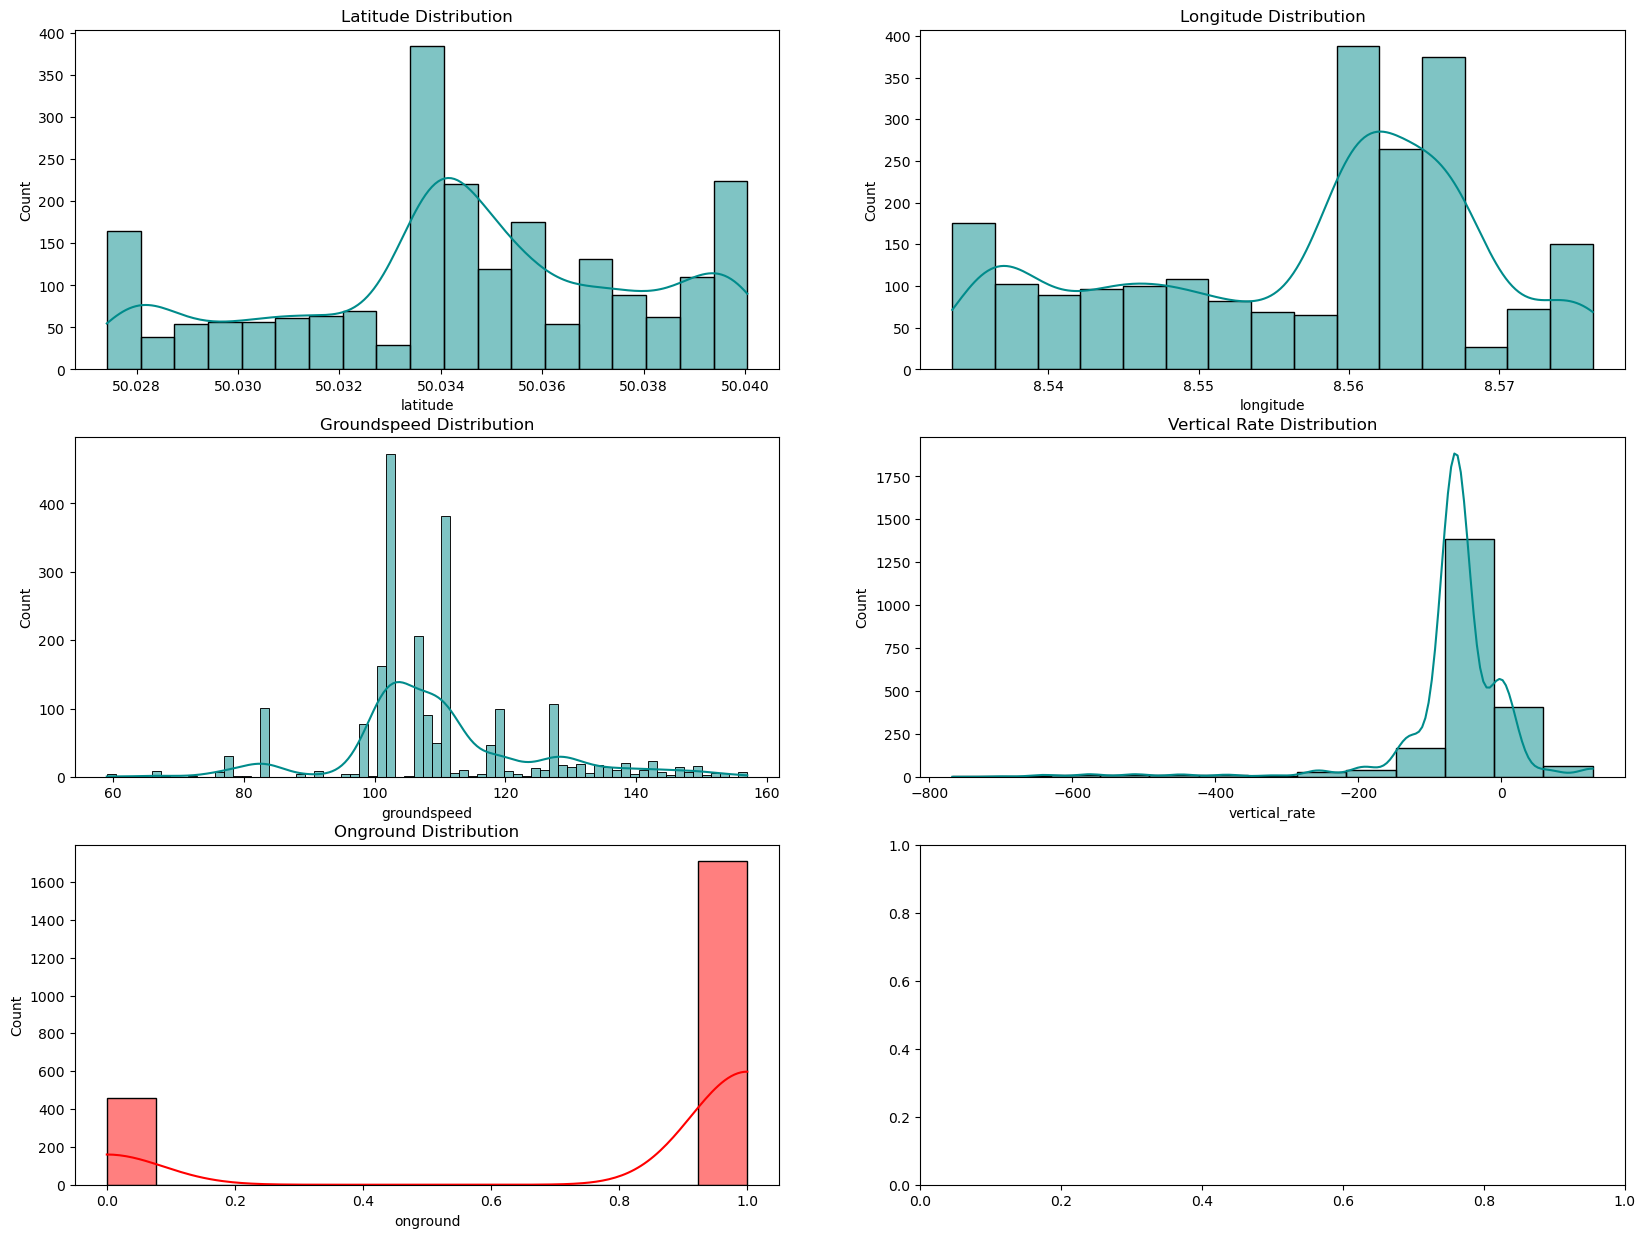

In [85]:
runway1_lat_range, runway1_long_range = (50.0271, 50.04006) , (8.53356, 8.58645)

runway1_dft09 = dft09[
                             ((dft09['latitude'] >= runway1_lat_range[0]) & (dft09['latitude'] <= runway1_lat_range[1]) &
                              (dft09['longitude'] >= runway1_long_range[0]) & (dft09['longitude'] <= runway1_long_range[1]))
]

plotdistrib(runway1_dft09)

## Filtering only flights that have landing coordinates within the coordinates of the 4 runways of Frankfurt

In [105]:
runway1_lat_range, runway1_long_range = (50.0271, 50.04006) , (8.53356, 8.58645)
runway2_lat_range, runway2_long_range = (50.03272, 50.04515) , (8.53498, 8.58692)
runway3_lat_range, runway3_long_range = (50.03415, 49.99855) , (8.52579, 8.52625)
runway4_lat_range, runway4_long_range = (50.03706, 50.04575) , (8.49717, 8.53362)


all_four_runways_dft09 = dft09[
                             ((dft09['latitude'] >= runway2_lat_range[0]) & (dft09['latitude'] <= runway2_lat_range[1]) &
                              (dft09['longitude'] >= runway2_long_range[0]) & (dft09['longitude'] <= runway2_long_range[1])) |

                             ((dft09['latitude'] >= runway2_lat_range[0]) & (dft09['latitude'] <= runway2_lat_range[1]) &
                              (dft09['longitude'] >= runway2_long_range[0]) & (dft09['longitude'] <= runway2_long_range[1])) |

                             ((dft09['latitude'] >= runway2_lat_range[0]) & (dft09['latitude'] <= runway2_lat_range[1]) &
                              (dft09['longitude'] >= runway2_long_range[0]) & (dft09['longitude'] <= runway2_long_range[1])) |

                             ((dft09['latitude'] >= runway2_lat_range[0]) & (dft09['latitude'] <= runway2_lat_range[1]) &
                              (dft09['longitude'] >= runway2_long_range[0]) & (dft09['longitude'] <= runway2_long_range[1]))
]

In [106]:
all_four_runways_dft09

,timestamp,onground,callsign,altitude,geoaltitude,latitude,longitude,groundspeed,vertical_rate,hour,...,lastseen,origin,spi,squawk,track,flight_id,alert,day,firstseen,destination
73718,2022-05-09 08:31:07+00:00,True,DLH011,NaN,NaN,50.043983,8.535564,129.0,-128.0,2022-05-09 08:00:00+00:00,...,2022-05-09 08:34:26+00:00,EDDH,False,1340,69.184934,DLH011_271,False,2022-05-09 00:00:00+00:00,2022-05-09 07:43:13+00:00,EDDF
73719,2022-05-09 08:31:08+00:00,True,DLH011,NaN,NaN,50.043983,8.535654,129.0,-128.0,2022-05-09 08:00:00+00:00,...,2022-05-09 08:34:26+00:00,EDDH,False,1340,69.184934,DLH011_271,False,2022-05-09 00:00:00+00:00,2022-05-09 07:43:13+00:00,EDDF
73720,2022-05-09 08:31:09+00:00,True,DLH011,NaN,NaN,50.043993,8.535746,129.0,-128.0,2022-05-09 08:00:00+00:00,...,2022-05-09 08:34:26+00:00,EDDH,False,1340,69.184934,DLH011_271,False,2022-05-09 00:00:00+00:00,2022-05-09 07:43:13+00:00,EDDF
73721,2022-05-09 08:31:10+00:00,True,DLH011,NaN,NaN,50.044005,8.535987,129.0,-128.0,2022-05-09 08:00:00+00:00,...,2022-05-09 08:34:26+00:00,EDDH,False,1340,69.184934,DLH011_271,False,2022-05-09 00:00:00+00:00,2022-05-09 07:43:13+00:00,EDDF
73722,2022-05-09 08:31:11+00:00,True,DLH011,NaN,NaN,50.044028,8.536191,129.0,-128.0,2022-05-09 08:00:00+00:00,...,2022-05-09 08:34:26+00:00,EDDH,False,1340,69.184934,DLH011_271,False,2022-05-09 00:00:00+00:00,2022-05-09 07:43:13+00:00,EDDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022-05-09 17:23:17+00:00,True,DLH9Y,100.0,NaN,50.042061,8.558024,129.0,-64.0,2022-05-09 17:00:00+00:00,...,2022-05-09 17:23:21+00:00,EBBR,False,1000,69.599791,DLH9Y_257,False,2022-05-09 00:00:00+00:00,2022-05-09 16:45:01+00:00,EDDF
1397,2022-05-09 17:23:18+00:00,True,DLH9Y,NaN,NaN,50.042084,8.558115,129.0,-64.0,2022-05-09 17:00:00+00:00,...,2022-05-09 17:23:21+00:00,EBBR,False,1000,69.599791,DLH9Y_257,False,2022-05-09 00:00:00+00:00,2022-05-09 16:45:01+00:00,EDDF
1398,2022-05-09 17:23:19+00:00,True,DLH9Y,NaN,NaN,50.042084,8.558115,129.0,-64.0,2022-05-09 17:00:00+00:00,...,2022-05-09 17:23:21+00:00,EBBR,False,1000,69.599791,DLH9Y_257,False,2022-05-09 00:00:00+00:00,2022-05-09 16:45:01+00:00,EDDF
1399,2022-05-09 17:23:20+00:00,True,DLH9Y,100.0,NaN,50.042084,8.558115,129.0,-64.0,2022-05-09 17:00:00+00:00,...,2022-05-09 17:23:21+00:00,EBBR,False,1000,69.599791,DLH9Y_257,False,2022-05-09 00:00:00+00:00,2022-05-09 16:45:01+00:00,EDDF


In [124]:
dft09[dft09.callsign == 'DLH471']

,timestamp,onground,callsign,altitude,geoaltitude,latitude,longitude,groundspeed,vertical_rate,hour,...,origin,spi,squawk,track,flight_id,alert,day,firstseen,destination,distance
55713,2022-05-09 00:00:01+00:00,False,DLH471,34975.0,35325.0,43.993029,-76.700200,474.0,0.0,2022-05-09 00:00:00+00:00,...,CYYZ,False,523,79.187455,DLH471_002,False,2022-05-09 00:00:00+00:00,2022-05-08 23:14:56+00:00,EDDF,6134.321678
55714,2022-05-09 00:00:02+00:00,False,DLH471,34975.0,35325.0,43.994332,-76.690914,474.0,0.0,2022-05-09 00:00:00+00:00,...,CYYZ,False,523,79.187455,DLH471_002,False,2022-05-09 00:00:00+00:00,2022-05-08 23:14:56+00:00,EDDF,6133.652179
55715,2022-05-09 00:00:03+00:00,False,DLH471,34975.0,35325.0,43.994751,-76.687971,474.0,0.0,2022-05-09 00:00:00+00:00,...,CYYZ,False,523,79.187455,DLH471_002,False,2022-05-09 00:00:00+00:00,2022-05-08 23:14:56+00:00,EDDF,6133.439601
55716,2022-05-09 00:00:04+00:00,False,DLH471,34975.0,35325.0,43.995170,-76.684701,474.0,0.0,2022-05-09 00:00:00+00:00,...,CYYZ,False,523,79.187455,DLH471_002,False,2022-05-09 00:00:00+00:00,2022-05-08 23:14:56+00:00,EDDF,6133.206640
55717,2022-05-09 00:00:05+00:00,False,DLH471,34975.0,35325.0,43.995635,-76.681366,474.0,0.0,2022-05-09 00:00:00+00:00,...,CYYZ,False,523,79.187455,DLH471_002,False,2022-05-09 00:00:00+00:00,2022-05-08 23:14:56+00:00,EDDF,6132.966362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193,2022-05-09 23:59:55+00:00,False,DLH471,35000.0,35725.0,46.533463,-68.830016,458.0,0.0,2022-05-09 23:00:00+00:00,...,CYYZ,False,522,73.899937,DLH471_005,False,2022-05-10 00:00:00+00:00,2022-05-09 22:32:48+00:00,EDDF,5471.911571
7194,2022-05-09 23:59:56+00:00,False,DLH471,35000.0,35725.0,46.533463,-68.830016,458.0,0.0,2022-05-09 23:00:00+00:00,...,CYYZ,False,522,73.899937,DLH471_005,False,2022-05-10 00:00:00+00:00,2022-05-09 22:32:48+00:00,EDDF,5471.911571
7195,2022-05-09 23:59:57+00:00,False,DLH471,35000.0,35725.0,46.535110,-68.821709,458.0,0.0,2022-05-09 23:00:00+00:00,...,CYYZ,False,522,73.899937,DLH471_005,False,2022-05-10 00:00:00+00:00,2022-05-09 22:32:48+00:00,EDDF,5471.283241
7196,2022-05-09 23:59:58+00:00,False,DLH471,35000.0,35725.0,46.535110,-68.821709,458.0,0.0,2022-05-09 23:00:00+00:00,...,CYYZ,False,522,73.899937,DLH471_005,False,2022-05-10 00:00:00+00:00,2022-05-09 22:32:48+00:00,EDDF,5471.283241


In [122]:
DLH001 = dft09[dft09.callsign == 'DLH001']
plot3Daxis(DLH001)

C:\CustomPF\anaconda3\envs\Lufthansa-Arrival-Time-Prediction\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [123]:
plotonmap(DLH001)

ValueError: Location values cannot contain NaNs.